In [1]:
import pandas as pd
from helper_functions import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

c:\Users\sophi\Miniconda3\envs\MT\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
occ_list = import_occupations('data/occupations_updated.csv')
occ_names = np.array(occ_list)[:,0]
models = ['roberta-base', 'roberta-large', 'bert-base-cased', 'bert-large-cased']

In [3]:
for model in models:
    path = model + 'data/prediction_evaluation.csv'
    occupation_data = evaluate_predictions(model, occ_names, path)

## Using seaborn for plotting the PPBS

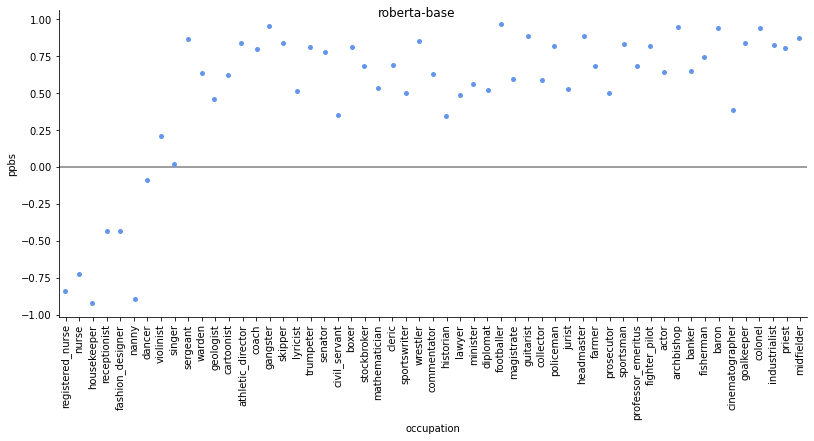

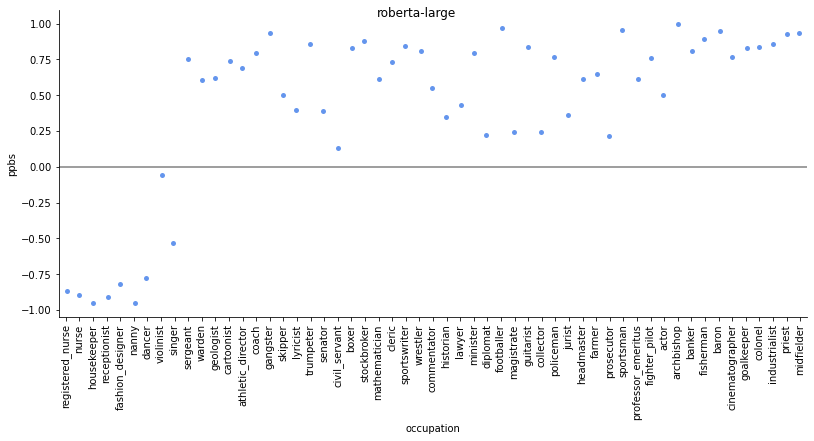

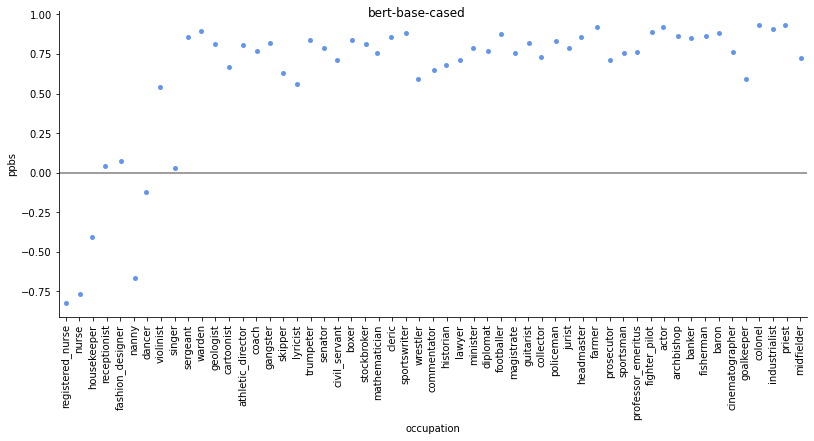

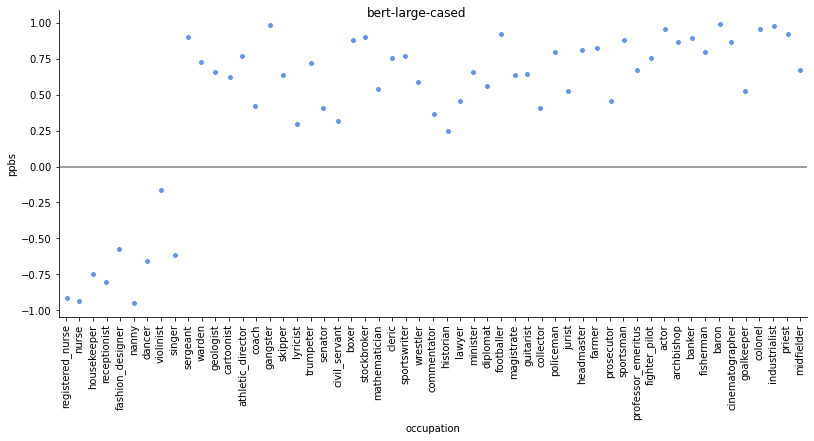

In [4]:
for model in models:
    path = model + 'data/prediction_evaluation.csv'
    occupation_data = pd.read_csv(path)
    graph = sns.catplot(data=occupation_data, x='occupation', y='ppbs', aspect=7/3, color='cornflowerblue')
    graph.refline(y=0, linestyle='solid')
    graph.fig.suptitle(model)
    plt.xticks(rotation=90)
    plt.show()

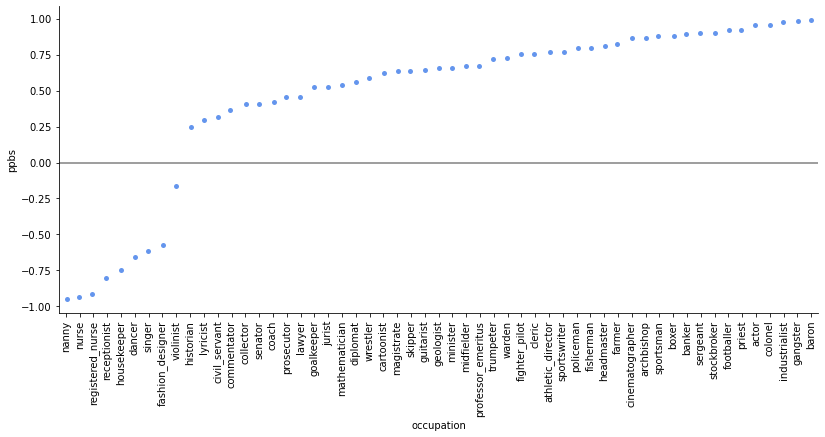

In [5]:
sorted = occupation_data.sort_values(by=['ppbs'])
graph = sns.catplot(data=sorted, x='occupation', y='ppbs', aspect=7/3, color='cornflowerblue')
graph.refline(y=0, linestyle='solid')
plt.xticks(rotation=90)
plt.show()

Display all models in the same plot by concatenating their dataframes and use seaborn.

In [8]:
models_roberta = ['roberta-base', 'roberta-large']
models_bert = ['bert-base-cased', 'bert-large-cased']

data_roberta = pd.DataFrame()
for model in models_roberta:
    path = model + 'data/prediction_evaluation.csv'
    occupation_data = pd.read_csv(path, index_col=0)
    occupation_data['model'] = model
    data_roberta = pd.concat([data_roberta, occupation_data], ignore_index=True)

data_bert = pd.DataFrame()
for model in models_bert:
    path = model + 'data/prediction_evaluation.csv'
    occupation_data = pd.read_csv(path, index_col=0)
    occupation_data['model'] = model
    data_bert = pd.concat([data_bert, occupation_data], ignore_index=True)
    
data = pd.DataFrame()
for model in models:
    path = model + 'data/prediction_evaluation.csv'
    occupation_data = pd.read_csv(path, index_col=0)
    occupation_data['model'] = model
    data = pd.concat([data, occupation_data], ignore_index=True)

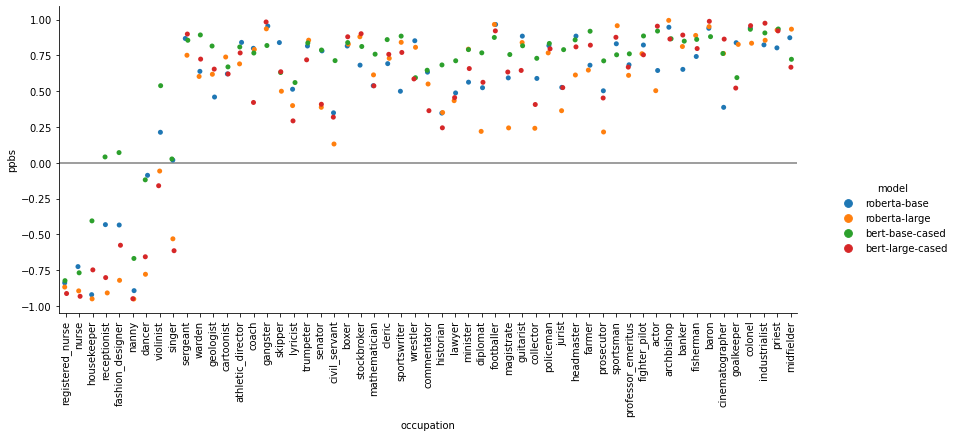

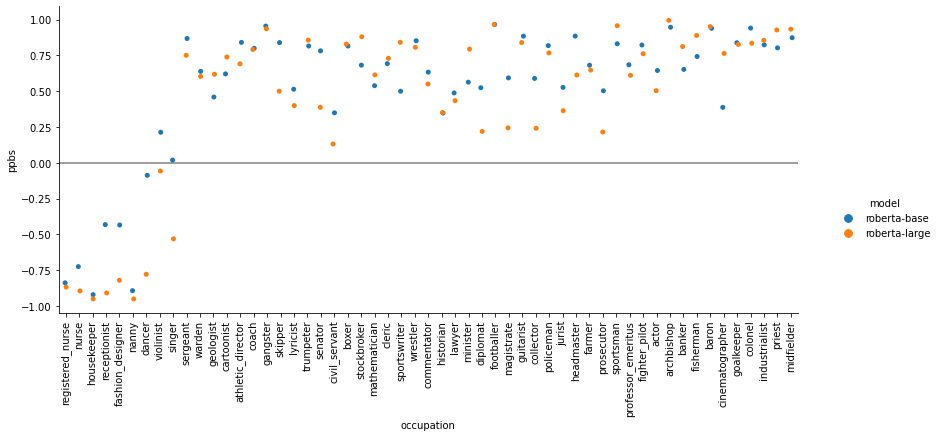

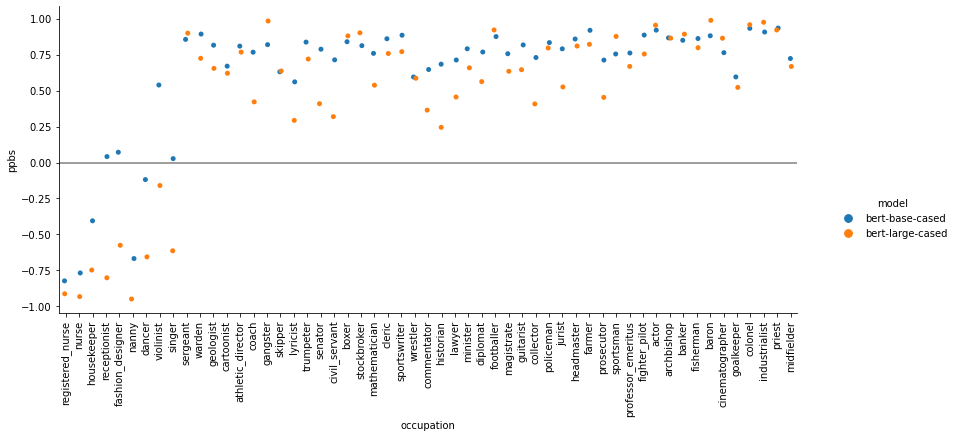

In [9]:
graph = sns.catplot(data=data, x='occupation', y='ppbs', aspect=7/3, hue='model', palette='colorblind')
graph.refline(y=0, linestyle='solid')
plt.xticks(rotation=90)
plt.show()
graph = sns.catplot(data=data_roberta, x='occupation', y='ppbs', aspect=7/3, hue='model', palette='colorblind')
graph.refline(y=0, linestyle='solid')
plt.xticks(rotation=90)
plt.show()
graph = sns.catplot(data=data_bert, x='occupation', y='ppbs', aspect=7/3, hue='model', palette='colorblind')
graph.refline(y=0, linestyle='solid')
plt.xticks(rotation=90)
plt.show()

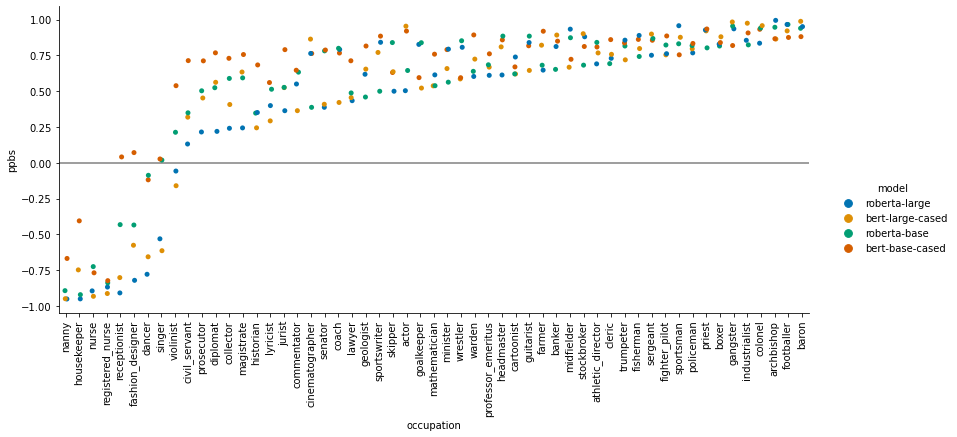

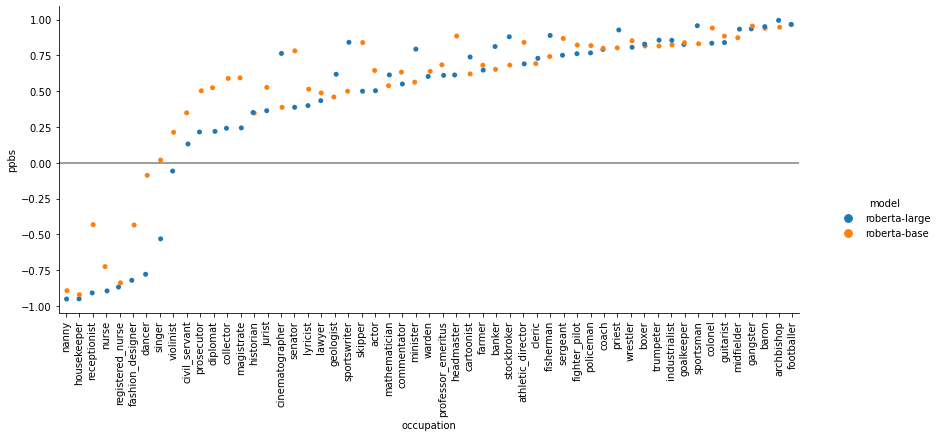

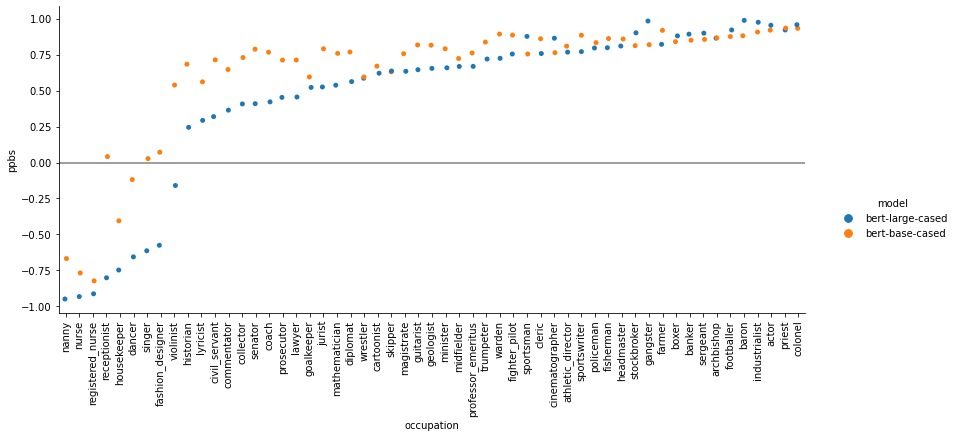

In [12]:
graph = sns.catplot(data=data.sort_values(by=['ppbs']), x='occupation', y='ppbs', aspect=7/3, hue='model', palette='colorblind')
graph.refline(y=0, linestyle='solid')
plt.xticks(rotation=90)
plt.show()
graph = sns.catplot(data=data_roberta.sort_values(by=['ppbs']), x='occupation', y='ppbs', aspect=7/3, hue='model', palette='colorblind')
graph.refline(y=0, linestyle='solid')
plt.xticks(rotation=90)
plt.show()
graph = sns.catplot(data=data_bert.sort_values(by=['ppbs']), x='occupation', y='ppbs', aspect=7/3, hue='model', palette='colorblind')
graph.refline(y=0, linestyle='solid')
plt.xticks(rotation=90)
plt.show()

## And the same with matplotlib

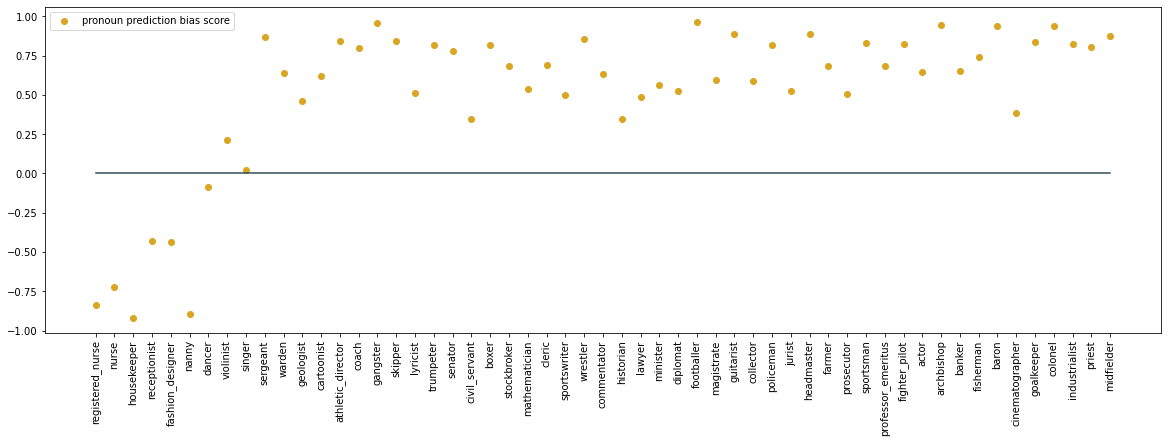

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
#ax.scatter(occupation_data['occupation'], occupation_data['she_p'], label="female probability", color='indianred')
#ax.scatter(occupation_data['occupation'], occupation_data['he_p'], label="male probability", color='cornflowerblue')
ax.scatter(occupation_data['occupation'], occupation_data['ppbs'], label="pronoun prediction bias score", color='goldenrod')
ax.plot(occupation_data['occupation'], np.zeros_like(occupation_data['occupation']), color='darkslategrey')
ax.legend()
plt.xticks(rotation=90)
plt.show()

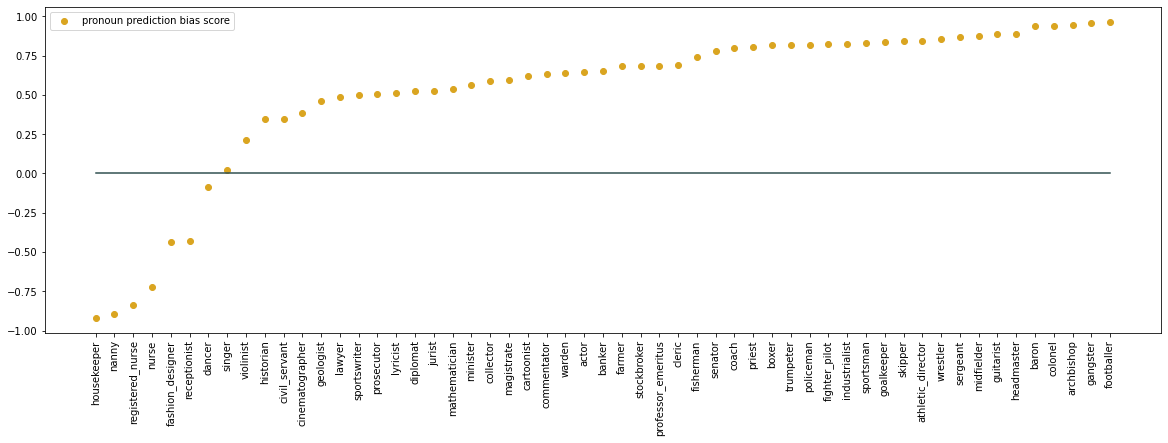

In [ ]:
sorted = occupation_data.sort_values(by=['ppbs'])
fig, ax = plt.subplots(figsize=(20,6))
#ax.scatter(sorted['occupation'], sorted['she_p'], label="female probability", color='indianred')
#ax.scatter(sorted['occupation'], sorted['he_p'], label="male probability", color='cornflowerblue')
ax.scatter(sorted['occupation'], sorted['ppbs'], label="pronoun prediction bias score", color='goldenrod')
ax.plot(sorted['occupation'], np.zeros_like(sorted['occupation']), color='darkslategrey')
ax.legend()
plt.xticks(rotation=90)
plt.show()